# Machine Learning Project
#### Kaggle | House Prices

Xiang Chen, Justin Pavis, Jeevanandhan Ramamoorthy, Justin Soniat

Data available: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Imports

In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ec2-user/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_181"; OpenJDK Runtime Environment (amzn-2.6.14.8.80.amzn1-x86_64 u181-b00); OpenJDK 64-Bit Server VM (build 24.181-b00, mixed mode)
  Starting server from /home/ec2-user/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5vpwz_ql
  JVM stdout: /tmp/tmp5vpwz_ql/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmp5vpwz_ql/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 5 days
H2O cluster name:,H2O_from_python_ec2_user_erpgkt
H2O cluster total nodes:,1
H2O cluster free memory:,3.483 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Load the Data

In [3]:
# Load the training and test dataset as H2O frames
train=h2o.import_file("train.csv")
test=h2o.import_file("test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.head(5)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## Adding important derived variables found by H2O Driverless AI

In [6]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [7]:
train['imp_feat_1'] = train['LotFrontage'] + train['YearRemodAdd']
train['imp_feat_2'] = train['BedroomAbvGr'] + train['GrLivArea']
train['imp_feat_3'] = train['GrLivArea'] - train['MoSold']
train['imp_feat_4'] = train['1stFlrSF'] - train['GrLivArea']
test['imp_feat_1'] = test['LotFrontage'] + test['YearRemodAdd']
test['imp_feat_2'] = test['BedroomAbvGr'] + test['GrLivArea']
test['imp_feat_3'] = test['GrLivArea'] - test['MoSold']
test['imp_feat_4'] = test['1stFlrSF'] - test['GrLivArea']

## Data Preprocessing

### I. Outliers

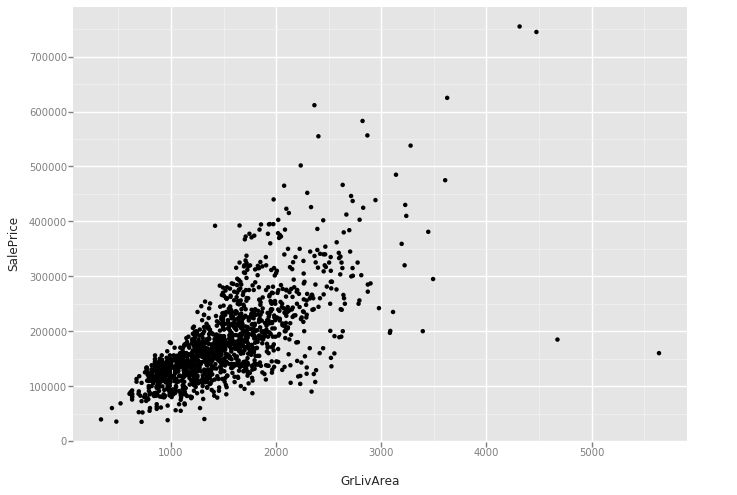

<ggplot: (8745852439388)>

In [8]:
# Scatter plot for outlier detection
ggplot(aes(x="GrLivArea",y="SalePrice"),data=train.as_data_frame()) + geom_point()

In [9]:
# Delete the two outliers detected in the lower right corner
train=train.as_data_frame()
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)
train=h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### II. Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44d6aa2240>,
      dtype=object)

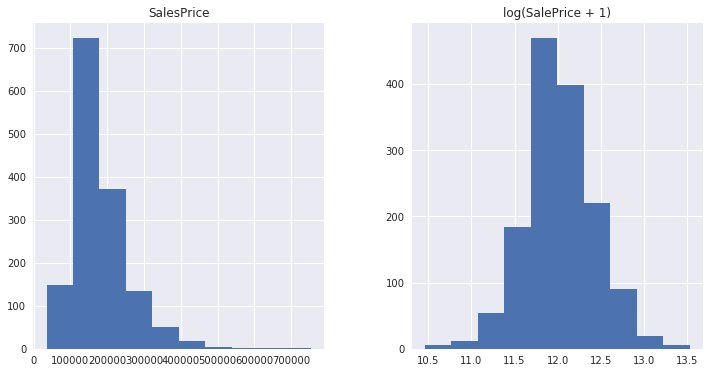

In [10]:
# Histogram to check skewness of the target variable
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
trdf=train.as_data_frame()
target=pd.DataFrame({"SalesPrice":trdf["SalePrice"], "log(SalePrice + 1)":np.log1p(trdf["SalePrice"])})
target.hist()

In [11]:
# Convert numeric variables that are actually categorical
NumStr = ["MSSubClass"]
for col in NumStr:
    train[col]=train[col].asfactor()

In [12]:
# Print out varaibles that are considered to be highly skewed
col1=[]
for i in range(0,train.ncol):
    if (train[i].skewness(True)[0]>=1) or (train[i].skewness(True)[0]<=-1):
        print (train[i].names, train[i].skewness(True) ) 
        col1.append(train[i].names)

['LotFrontage'] [1.6994303998568425]
['LotArea'] [12.560985555655291]
['MasVnrArea'] [2.6923994697617104]
['BsmtFinSF2'] [4.247549637960442]
['LowQualFinSF'] [8.995688015354169]
['GrLivArea'] [1.009951290231826]
['BsmtHalfBath'] [4.095894691347057]
['KitchenAbvGr'] [4.480267553258233]
['WoodDeckSF'] [1.5442143796306373]
['OpenPorchSF'] [2.337420743825279]
['EnclosedPorch'] [3.0839869312270287]
['3SsnPorch'] [10.286509627844266]
['ScreenPorch'] [4.114689936247767]
['PoolArea'] [15.93253224170097]
['MiscVal'] [24.434913089449186]
['SalePrice'] [1.8793604459195041]
['imp_feat_2'] [1.0093034817011586]
['imp_feat_3'] [1.0117677888614984]


In [13]:
# Perfrom log transformations on the skewed numeric varaibles
for col in col1:
    col_name=col[0] + "_log1p"
    train[col_name]=train[col[0]].log1p()
    train=train.drop(col[0])

In [14]:
# Do the same for the test set
col1.remove(['SalePrice'])
for col in col1:
    col_name=col[0] + "_log1p"
    test[col_name]=test[col[0]].log1p()
    test=test.drop(col[0])

### III. Train-Valid Split

In [15]:
# 70% as training, 30% as validation
train, valid= train.split_frame([0.7])
print(train.shape)
print(valid.shape)

(1054, 86)
(404, 86)


### IV. Impute Missing Values

In [16]:
# Print out varaibles with missing values in the training set
train=train.as_data_frame()
total_missing = train.isnull().sum().sort_values(ascending=False)
total_missing.head(20)

PoolQC               1051
MiscFeature          1013
Alley                 997
Fence                 851
FireplaceQu           491
LotFrontage_log1p     191
imp_feat_1            191
GarageType             59
GarageCond             59
GarageQual             59
GarageFinish           59
GarageYrBlt            59
BsmtFinType2           27
BsmtExposure           27
BsmtQual               26
BsmtCond               26
BsmtFinType1           26
MasVnrArea_log1p        5
MasVnrType              5
ExterQual               0
dtype: int64

We identify 3 types of missing values, and use different approaches to deal with them.

In [17]:
# Type 1
# "Fancy features": most of the houses do not have a pool, fence, fireplace, etc., so impute the missings with “None"
# if it's categorical, "0" if it's numeric.
train["PoolQC"].fillna("None", inplace=True)
train["MiscFeature"].fillna("None", inplace=True)
train["Alley"].fillna("None", inplace=True)
train["Fence"].fillna("None", inplace=True)
train["FireplaceQu"].fillna("None", inplace=True)
train["GarageQual"].fillna("None", inplace=True)
train["GarageFinish"].fillna("None", inplace=True)
train["GarageType"].fillna("None", inplace=True)
train["GarageCond"].fillna("None", inplace=True)
train["BsmtExposure"].fillna("None", inplace=True)
train["BsmtFinType2"].fillna("None", inplace=True)
train["BsmtCond"].fillna("None", inplace=True)
train["BsmtQual"].fillna("None", inplace=True)
train["BsmtFinType1"].fillna("None", inplace=True)
train["MasVnrType"].fillna("None", inplace=True)
train["MasVnrArea_log1p"].fillna(0, inplace=True)
train["imp_feat_1"].fillna(0, inplace=True)
print("Done")

Done


In [18]:
# Type 2
# "Essentials": or "Must haves", every house should have a electrical system..., so impute missings with the mode
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mode()[0], inplace=True)
print("Done")

Done


In [19]:
# Type 3
# "Depend on Neighborhood": houses located in the same neighborhood are likely to have similar lot frontage values
train["LotFrontage_log1p"] = train.groupby("Neighborhood")["LotFrontage_log1p"].transform(lambda x: x.fillna(x.median()))
#train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
print("Done")

Done


In [20]:
# Check if there's any missing values left
total_missing = train.isnull().sum().sort_values(ascending=False)
total_missing.head(5)

imp_feat_3_log1p    0
BsmtFinSF1          0
MasVnrType          0
ExterQual           0
ExterCond           0
dtype: int64

In [21]:
# Repeat the same steps for the validation set
valid=valid.as_data_frame()
total_missing1 = valid.isnull().sum().sort_values(ascending=False)
total_missing1.head(20)

PoolQC               401
MiscFeature          391
Alley                370
Fence                326
FireplaceQu          199
LotFrontage_log1p     68
imp_feat_1            68
GarageType            22
GarageCond            22
GarageQual            22
GarageFinish          22
GarageYrBlt           22
BsmtFinType2          11
BsmtQual              11
BsmtCond              11
BsmtExposure          11
BsmtFinType1          11
MasVnrArea_log1p       3
MasVnrType             3
Electrical             1
dtype: int64

In [22]:
valid["LotFrontage_log1p"] = valid.groupby("Neighborhood")["LotFrontage_log1p"].transform(lambda x: x.fillna(x.median()))
valid["LotFrontage"] = valid.groupby("Neighborhood")["LotFrontage_log1p"].transform(lambda x: x.fillna(x.median()))
a=["GarageYrBlt","Electrical","MSZoning","Functional","Utilities","SaleType","Exterior2nd","KitchenQual","Exterior1st"
  ,"BsmtFullBath"]
for i in a:
    valid[i].fillna(valid[i].mode()[0], inplace=True)


b=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageQual","GarageFinish",
   "GarageType","GarageCond","BsmtExposure","BsmtFinType2","BsmtCond","BsmtQual","BsmtFinType1","MasVnrType"]
for i in b:
    valid[i].fillna("None", inplace=True)

c=["MasVnrArea_log1p","imp_feat_1","BsmtHalfBath_log1p","BsmtFinSF2_log1p","TotalBsmtSF","GarageCars","GarageArea",
   "BsmtUnfSF","BsmtFinSF1"]
for i in c:
    valid[i].fillna(0, inplace=True)

In [23]:
# Check if there's any missing values left
total_missing1 = valid.isnull().sum().sort_values(ascending=False)
total_missing1.head(5)

LotFrontage    0
BsmtFinSF1     0
MasVnrType     0
ExterQual      0
ExterCond      0
dtype: int64

In [24]:
# Repeat the same steps for the test set
test=test.as_data_frame()
total_missing2 = test.isnull().sum().sort_values(ascending=False)
total_missing2.head(35)

PoolQC                1456
MiscFeature           1408
Alley                 1352
Fence                 1169
FireplaceQu            730
LotFrontage_log1p      227
imp_feat_1             227
GarageCond              78
GarageYrBlt             78
GarageFinish            78
GarageQual              78
GarageType              76
BsmtCond                45
BsmtQual                44
BsmtExposure            44
BsmtFinType1            42
BsmtFinType2            42
MasVnrType              16
MasVnrArea_log1p        15
MSZoning                 4
Utilities                2
Functional               2
BsmtFullBath             2
BsmtHalfBath_log1p       2
Exterior1st              1
Exterior2nd              1
GarageCars               1
GarageArea               1
KitchenQual              1
TotalBsmtSF              1
BsmtUnfSF                1
SaleType                 1
BsmtFinSF1               1
TotalSF                  1
BsmtFinSF2_log1p         1
dtype: int64

In [25]:
test["LotFrontage_log1p"] = test.groupby("Neighborhood")["LotFrontage_log1p"].transform(lambda x: x.fillna(x.median()))
#test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
a=["GarageYrBlt","Electrical","MSZoning","Functional","Utilities","SaleType","Exterior2nd","KitchenQual","Exterior1st"
  ,"BsmtFullBath"]
for i in a:
    test[i].fillna(test[i].mode()[0], inplace=True)


b=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageQual","GarageFinish",
   "GarageType","GarageCond","BsmtExposure","BsmtFinType2","BsmtCond","BsmtQual","BsmtFinType1","MasVnrType"]
for i in b:
    test[i].fillna("None", inplace=True)

c=["MasVnrArea_log1p","imp_feat_1","BsmtHalfBath_log1p","BsmtFinSF2_log1p","TotalBsmtSF","GarageCars","GarageArea",
   "BsmtUnfSF","BsmtFinSF1", "TotalSF"]
for i in c:
    test[i].fillna(0, inplace=True)

In [26]:
# Check if there's any missing values left
total_missing2 = test.isnull().sum().sort_values(ascending=False)
total_missing2.head(5)

imp_feat_3_log1p    0
BsmtFinType1        0
Exterior2nd         0
MasVnrType          0
ExterQual           0
dtype: int64

### V. Feature Engineering

In [27]:
train["MSSubClass"]=train["MSSubClass"].astype(str)
valid["MSSubClass"]=valid["MSSubClass"].astype(str)
test["MSSubClass"]=test["MSSubClass"].astype(str)

In [28]:
#Separate Numeric and Categorical variables
all_col = train.columns
num_col = train._get_numeric_data().columns
num_col=list(num_col)
cat_col = list(set(all_col)-set(num_col))
print(num_col)
print(cat_col)

['Id', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'TotalSF', 'imp_feat_1', 'imp_feat_4', 'LotFrontage_log1p', 'LotArea_log1p', 'MasVnrArea_log1p', 'BsmtFinSF2_log1p', 'LowQualFinSF_log1p', 'GrLivArea_log1p', 'BsmtHalfBath_log1p', 'KitchenAbvGr_log1p', 'WoodDeckSF_log1p', 'OpenPorchSF_log1p', 'EnclosedPorch_log1p', '3SsnPorch_log1p', 'ScreenPorch_log1p', 'PoolArea_log1p', 'MiscVal_log1p', 'SalePrice_log1p', 'imp_feat_2_log1p', 'imp_feat_3_log1p']
['Heating', 'SaleCondition', 'BldgType', 'MSZoning', 'MSSubClass', 'Utilities', 'GarageCond', 'LandContour', 'PoolQC', 'FireplaceQu', 'LotShape', 'Foundation', 'Functional', 'Exterior1st', 'GarageQual', 'HouseStyle', 'HeatingQC', 'BsmtFinType1', 'BsmtCond', 'CentralAir', 'GarageFinish', 'BsmtFinType2', 'ExterQual', 'K

In [29]:
# Train set
train_numeric=train._get_numeric_data()
print(train_numeric.shape)

train_categorical=pd.DataFrame()
for col in train.columns:
    if col not in train_numeric.columns:
        train_categorical[col]=train[col]
print(train_categorical.shape)

(1054, 42)
(1054, 44)


In [30]:
# Validation set
valid_numeric=valid._get_numeric_data()
print(valid_numeric.shape)
valid_categorical=pd.DataFrame()
for col in valid.columns:
    if col not in valid_numeric.columns:
        valid_categorical[col]=valid[col]
print(valid_categorical.shape)

(404, 43)
(404, 44)


In [31]:
# Test set
test_numeric=test._get_numeric_data()
print(test_numeric.shape)
test_categorical=pd.DataFrame()
for col in test.columns:
    if col not in valid_numeric.columns:
        test_categorical[col]=test[col]
print(test_categorical.shape)

(1459, 41)
(1459, 44)


In [32]:
# Concatenate into one set to perform one-hot encoding
alldata=pd.concat((train_categorical,
                  valid_categorical,
                  test_categorical))
print(alldata.shape)

(2917, 44)


For categorical variables, we do one-hot encoding.

In [33]:
alldata_dummy=pd.get_dummies(alldata)
alldata_dummy.shape

(2917, 281)

In [34]:
train_dummy=alldata_dummy.iloc[:train.shape[0],:]
valid_dummy=alldata_dummy.iloc[train.shape[0]:train.shape[0]+valid.shape[0],:]
test_dummy=alldata_dummy.iloc[train.shape[0]+valid.shape[0]:,:]

In [35]:
print(train_dummy.shape)
print(valid_dummy.shape)
print(test_dummy.shape)

(1054, 281)
(404, 281)
(1459, 281)


For numeric variables, we generate more features by utilizing simple math operations, such as addition, quadratic,
cubic.

In [36]:
a = [name for name in train_numeric.columns if name not in ["Id",'SalePrice_log1p']]

In [37]:
# Quadratic
for i in a:
    new_col_name = i + '^2'
    train_numeric[new_col_name]=train_numeric[i]**2
train_numeric.shape

(1054, 82)

In [38]:
# Cubic
for i in a:
    new_col_name = i + '^3'
    train_numeric[new_col_name]=train_numeric[i]**3
train_numeric.shape

(1054, 122)

In [39]:
# Addition
for i in range(len(a)):
    for j in range(i+1,len(a)):
        new_col_name = a[i] + "+" +a[j]
        train_numeric[new_col_name]=train_numeric[a[i]]+train_numeric[a[j]]
train_numeric.shape

(1054, 902)

In [40]:
# Repeat the same steps for the validation set
for i in a:
    new_col_name = i + '^2'
    valid_numeric[new_col_name]=valid_numeric[i]**2

for i in a:
    new_col_name = i + '^3'
    valid_numeric[new_col_name]=valid_numeric[i]**3

for i in range(len(a)):
    for j in range(i+1,len(a)):
        new_col_name = a[i] + "+" +a[j]
        valid_numeric[new_col_name]=valid_numeric[a[i]]+valid_numeric[a[j]]
valid_numeric.shape

(404, 903)

In [41]:
# Repeat the same steps for the testing set
for i in a:
    new_col_name = i + '^2'
    test_numeric[new_col_name]=test_numeric[i]**2

for i in a:
    new_col_name = i + '^3'
    test_numeric[new_col_name]=test_numeric[i]**3

for i in range(len(a)):
    for j in range(i+1,len(a)):
        new_col_name = a[i] + "+" +a[j]
        test_numeric[new_col_name]=test_numeric[a[i]]+test_numeric[a[j]]
test_numeric.shape

(1459, 901)

### VI. Get the Data Ready for Modeling

In [42]:
train=pd.concat([train_numeric,train_dummy],axis=1)
train.shape

(1054, 1183)

In [43]:
valid=pd.concat([valid_numeric,valid_dummy],axis=1)
valid.shape

(404, 1184)

In [44]:
test=pd.concat([test_numeric,test_dummy],axis=1)
test.shape

(1459, 1182)

In [45]:
train=h2o.H2OFrame(train)
valid=h2o.H2OFrame(valid)
test=h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [46]:
y = 'SalePrice_log1p'
X = [name for name in train.columns if name not in ["Id",y]]

In [47]:
print(y)
print(X)

SalePrice_log1p


['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'TotalSF', 'imp_feat_1', 'imp_feat_4', 'LotFrontage_log1p', 'LotArea_log1p', 'MasVnrArea_log1p', 'BsmtFinSF2_log1p', 'LowQualFinSF_log1p', 'GrLivArea_log1p', 'BsmtHalfBath_log1p', 'KitchenAbvGr_log1p', 'WoodDeckSF_log1p', 'OpenPorchSF_log1p', 'EnclosedPorch_log1p', '3SsnPorch_log1p', 'ScreenPorch_log1p', 'PoolArea_log1p', 'MiscVal_log1p', 'imp_feat_2_log1p', 'imp_feat_3_log1p', 'OverallQual^2', 'OverallCond^2', 'YearBuilt^2', 'YearRemodAdd^2', 'BsmtFinSF1^2', 'BsmtUnfSF^2', 'TotalBsmtSF^2', '1stFlrSF^2', '2ndFlrSF^2', 'BsmtFullBath^2', 'FullBath^2', 'HalfBath^2', 'BedroomAbvGr^2', 'TotRmsAbvGrd^2', 'Fireplaces^2', 'GarageYrBlt^2', 'GarageCars^2', 'GarageArea^2', 'MoSold^2', 'YrSold^2', 'TotalSF^2', 'imp_feat_1^2', '

## Modeling

### I. Linear Model

In [48]:
# Initialize linear model
glm = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='glm1',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True)
# Train the model
glm.train(X, y, training_frame=train,
         validation_frame=valid)

# Print model information
glm

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0089439328963871
RMSE: 0.09457236856707725
MAE: 0.06867686629165777
RMSLE: 0.007346687717667407
R^2: 0.9437271674095523
Mean Residual Deviance: 0.0089439328963871
Null degrees of freedom: 1053
Residual degrees of freedom: 956
Null deviance: 167.5214279940782
Residual deviance: 9.426905272792004
AIC: -1782.363549965003

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.0149807823277673
RMSE: 0.12239600617572167
MAE: 0.0806206278553582
RMSLE: 0.009571271907004195
R^2: 0.9071520138772271
Mean Residual Deviance: 0.0149807823277673
Null degrees of freedom: 403
Residual degrees of freedom: 306
Null deviance: 65.29448452986146
Residual deviance: 6.052236060417989
AIC: -352.6964444560432
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-06-29 18:05:32,0.000 sec,1,.69E0,1,0.1589387,0.1616200
,2018-06-29 18:05:32,0.171 sec,2,.66E0,6,0.1490008,0.1515875
,2018-06-29 18:05:32,0.211 sec,3,.63E0,7,0.1389687,0.1413781
,2018-06-29 18:05:32,0.265 sec,4,.6E0,7,0.1296087,0.1318573
,2018-06-29 18:05:32,0.317 sec,5,.57E0,7,0.1210141,0.1231075
---,---,---,---,---,---,---,---
,2018-06-29 18:05:37,4.754 sec,89,.11E-1,100,0.0088278,0.0149818
,2018-06-29 18:05:37,4.836 sec,90,.11E-1,105,0.0087136,0.0149874
,2018-06-29 18:05:37,4.925 sec,91,.1E-1,107,0.0086023,0.0149897
,2018-06-29 18:05:37,5.014 sec,92,.1E-1,115,0.0084888,0.0149963



See the whole table with table.as_data_frame()


### II. Neural Network

In [49]:
# Imports
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [50]:
# Initialize nn model
nn_model = H2ODeepLearningEstimator(
    epochs=50,                    
    hidden=[100],                 
    input_dropout_ratio=0.2,      
    hidden_dropout_ratios=[0.05], 
    activation='TanhWithDropout', 
    l1=0.001,                     
    l2=0.01,                      
    adaptive_rate=True,           
    stopping_rounds=5,            
    score_each_iteration=True,    
    model_id='nn_model')          

# Train nn model
nn_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# Print model information
nn_model

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  nn_model


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.014918382962846347
RMSE: 0.12214083249612452
MAE: 0.08503682378699037
RMSLE: 0.00952972826423468
Mean Residual Deviance: 0.014918382962846347

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.02041147299128086
RMSE: 0.14286872642842752
MAE: 0.10026559411044203
RMSLE: 0.0110208494071444
Mean Residual Deviance: 0.02041147299128086
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,validation_rmse,validation_deviance,validation_mae
,2018-06-29 18:05:39,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2018-06-29 18:05:42,4.578 sec,1375 obs/sec,4.3026565,1,4535.0,0.1546778,0.0239252,0.1216400,0.1733844,0.0300622,0.1350443
,2018-06-29 18:05:46,8.129 sec,1368 obs/sec,8.6641366,2,9132.0,0.1563026,0.0244305,0.1209169,0.1781328,0.0317313,0.1390687
,2018-06-29 18:05:49,11.446 sec,1392 obs/sec,12.9952562,3,13697.0,0.1306036,0.0170573,0.0967987,0.1518008,0.0230435,0.1108661
,2018-06-29 18:05:53,14.783 sec,1403 obs/sec,17.3074004,4,18242.0,0.1221408,0.0149184,0.0850368,0.1428687,0.0204115,0.1002656
,2018-06-29 18:05:56,18.374 sec,1386 obs/sec,21.6204934,5,22788.0,0.1330027,0.0176897,0.0970225,0.1503931,0.0226181,0.1099873
,2018-06-29 18:06:00,21.661 sec,1397 obs/sec,25.9421252,6,27343.0,0.1280892,0.0164069,0.0919893,0.1454387,0.0211524,0.1041119
,2018-06-29 18:06:03,25.041 sec,1400 obs/sec,30.2874763,7,31923.0,0.1219454,0.0148707,0.0882986,0.1465682,0.0214822,0.1072302
,2018-06-29 18:06:06,28.357 sec,1404 obs/sec,34.5834915,8,36451.0,0.1253672,0.0157169,0.0891449,0.1495957,0.0223789,0.1057874
,2018-06-29 18:06:10,31.634 sec,1410 obs/sec,38.9174573,9,41019.0,0.1192196,0.0142133,0.0853851,0.1448438,0.0209797,0.1057805


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
SaleCondition_Abnorml,1.0,1.0,0.0074335
Neighborhood_Crawfor,0.7708308,0.7708308,0.0057300
OverallQual^3,0.6287395,0.6287395,0.0046738
KitchenQual_Ex,0.6139218,0.6139218,0.0045636
CentralAir_Y,0.5632226,0.5632226,0.0041867
---,---,---,---
ExterCond_Ex,0.0052784,0.0052784,0.0000392
PoolArea_log1p^3,0.0040387,0.0040387,0.0000300
SaleType_ConLw,0.0040250,0.0040250,0.0000299
Condition2_RRAe,0.0035211,0.0035211,0.0000262



See the whole table with table.as_data_frame()


### III. Random Forest

In [51]:
# Initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# Train rf model
rf_model1.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# Print model information
print(rf_model1)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1530295503464_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.018034903342396217
RMSE: 0.13429409273082796
MAE: 0.09240507804166372
RMSLE: 0.01049575218113301
Mean Residual Deviance: 0.018034903342396217

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.01713671237255296
RMSE: 0.13090726630921967
MAE: 0.08865691643529876
RMSLE: 0.01014248143152478
Mean Residual Deviance: 0.01713671237255296

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.019980690978662584
RMSE: 0.14135307205244102
MAE: 0.09677316513075719
RMSLE: 0.011046329213449835
Mean Residual Deviance: 0.019980690978662584
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0967275,0.0007691,0.0953280,0.0979802,0.0968744
mean_residual_deviance,0.0199219,0.0012344,0.0195514,0.0222211,0.0179933
mse,0.0199219,0.0012344,0.0195514,0.0222211,0.0179933
r2,0.8742585,0.0041669,0.8805966,0.8664033,0.8757756
residual_deviance,0.0199219,0.0012344,0.0195514,0.0222211,0.0179933
rmse,0.1410110,0.0043500,0.1398263,0.1490675,0.1341392
rmsle,0.0110120,0.0004063,0.0109083,0.0117618,0.0103660


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 18:08:09,1 min 48.493 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-06-29 18:08:09,1 min 48.661 sec,1.0,0.1984669,0.1417323,0.0393891,0.2127482,0.1435755,0.0452618
,2018-06-29 18:08:09,1 min 48.820 sec,2.0,0.1860208,0.1339107,0.0346037,0.1716216,0.1192145,0.0294540
,2018-06-29 18:08:09,1 min 48.979 sec,3.0,0.1755133,0.1285827,0.0308049,0.1569867,0.1087050,0.0246448
,2018-06-29 18:08:10,1 min 49.134 sec,4.0,0.1765075,0.1298944,0.0311549,0.1546426,0.1075228,0.0239143
---,---,---,---,---,---,---,---,---,---
,2018-06-29 18:08:52,2 min 32.087 sec,224.0,0.1342967,0.0923555,0.0180356,0.1309982,0.0887661,0.0171605
,2018-06-29 18:08:53,2 min 32.321 sec,225.0,0.1343639,0.0924515,0.0180536,0.1309699,0.0887081,0.0171531
,2018-06-29 18:08:53,2 min 32.566 sec,226.0,0.1342685,0.0923878,0.0180280,0.1309229,0.0887010,0.0171408
,2018-06-29 18:08:53,2 min 32.807 sec,227.0,0.1342343,0.0923584,0.0180189,0.1309419,0.0886568,0.0171458



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual+GrLivArea_log1p,2393.3637695,1.0,0.0708725
OverallQual+imp_feat_3_log1p,2085.9213867,0.8715438,0.0617685
OverallQual+imp_feat_2_log1p,1850.2829590,0.7730889,0.0547907
GarageArea+TotalSF,1347.6459961,0.5630761,0.0399066
OverallQual+GarageCars,1241.4197998,0.5186925,0.0367610
---,---,---,---
GarageType_2Types,0.0,0.0,0.0
PoolQC_Gd,0.0,0.0,0.0
PoolQC_None,0.0,0.0,0.0
MiscFeature_Gar2,0.0,0.0,0.0



See the whole table with table.as_data_frame()



### IV. Extremely Random Forest

In [52]:
# Initialize rf model
erf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345, 
    histogram_type='random')

# Train rf model
erf_model1.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# Print model information
print(erf_model1)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1530295503464_2


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.01830675402906518
RMSE: 0.13530245389151366
MAE: 0.09337319817859195
RMSLE: 0.010580492093585147
Mean Residual Deviance: 0.01830675402906518

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.01716188036794908
RMSE: 0.1310033601399181
MAE: 0.0883235624797177
RMSLE: 0.010149836520584819
Mean Residual Deviance: 0.01716188036794908

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.019886261785472138
RMSE: 0.14101865757931514
MAE: 0.09643839137477145
RMSLE: 0.011020620403921731
Mean Residual Deviance: 0.019886261785472138
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0963724,0.0011187,0.0943176,0.0981665,0.0966333
mean_residual_deviance,0.0198186,0.0014323,0.0194144,0.0224767,0.0175647
mse,0.0198186,0.0014323,0.0194144,0.0224767,0.0175647
r2,0.8750114,0.0051318,0.8814331,0.8648668,0.8787344
residual_deviance,0.0198186,0.0014323,0.0194144,0.0224767,0.0175647
rmse,0.1405966,0.0050595,0.1393357,0.1499222,0.1325321
rmsle,0.0109794,0.0004614,0.0108683,0.0118283,0.0102415


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 18:10:22,1 min 27.812 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-06-29 18:10:22,1 min 28.020 sec,1.0,0.2065737,0.1397325,0.0426727,0.2262007,0.1451406,0.0511668
,2018-06-29 18:10:22,1 min 28.199 sec,2.0,0.1831120,0.1290449,0.0335300,0.1728333,0.1208772,0.0298714
,2018-06-29 18:10:23,1 min 28.378 sec,3.0,0.1659655,0.1219131,0.0275445,0.1621132,0.1125199,0.0262807
,2018-06-29 18:10:23,1 min 28.555 sec,4.0,0.1685295,0.1243530,0.0284022,0.1582890,0.1102539,0.0250554
---,---,---,---,---,---,---,---,---,---
,2018-06-29 18:10:56,2 min 1.957 sec,167.0,0.1353559,0.0934646,0.0183212,0.1309785,0.0884130,0.0171554
,2018-06-29 18:10:56,2 min 2.191 sec,168.0,0.1353448,0.0934354,0.0183182,0.1309712,0.0883174,0.0171534
,2018-06-29 18:10:57,2 min 2.429 sec,169.0,0.1353476,0.0933885,0.0183190,0.1310133,0.0883330,0.0171645
,2018-06-29 18:10:57,2 min 2.667 sec,170.0,0.1353410,0.0934267,0.0183172,0.1310017,0.0883362,0.0171614



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual+imp_feat_2_log1p,1734.0064697,1.0,0.0679893
OverallQual+GrLivArea_log1p,1642.6278076,0.9473020,0.0644064
OverallQual+imp_feat_3_log1p,1159.3061523,0.6685708,0.0454557
OverallQual+LotArea_log1p,1078.0393066,0.6217043,0.0422693
GarageArea+TotalSF,1041.5181885,0.6006426,0.0408373
---,---,---,---
Fence_MnWw,0.0,0.0,0.0
MiscFeature_Gar2,0.0,0.0,0.0
MiscFeature_Othr,0.0,0.0,0.0
SaleType_ConLw,0.0,0.0,0.0



See the whole table with table.as_data_frame()



### V. GBM Model

In [53]:
# Initialize GBM model
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# Train the model
h2o_gbm_model.train(x=X,
                    y=y,
                    training_frame=train,
                    validation_frame=valid)

# Print model information
print(h2o_gbm_model)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1530295503464_3


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.005436754939294033
RMSE: 0.0737343538609652
MAE: 0.048829043386557074
RMSLE: 0.0057958338525516415
Mean Residual Deviance: 0.005436754939294033

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.016018359959300912
RMSE: 0.1265636597104434
MAE: 0.0872503688652125
RMSLE: 0.009793152557528004
Mean Residual Deviance: 0.016018359959300912

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.016071412235441198
RMSE: 0.12677307377925803
MAE: 0.08730728649033291
RMSLE: 0.009904565475893556
Mean Residual Deviance: 0.016071412235441198
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0873410,0.0028682,0.0844254,0.0845205,0.0930771
mean_residual_deviance,0.0160517,0.0003738,0.0158393,0.0167788,0.0155372
mse,0.0160517,0.0003738,0.0158393,0.0167788,0.0155372
r2,0.8983743,0.0030640,0.9032670,0.8991234,0.8927326
residual_deviance,0.0160517,0.0003738,0.0158393,0.0167788,0.0155372
rmse,0.1266785,0.0014691,0.1258543,0.1295329,0.1246482
rmsle,0.0098927,0.0001701,0.0097998,0.0102226,0.0096557


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 18:21:37,10 min 38.674 sec,0.0,0.3986712,0.3106806,0.1589387,0.4020199,0.3094516,0.1616200
,2018-06-29 18:21:37,10 min 38.790 sec,1.0,0.3971946,0.3094363,0.1577635,0.4005868,0.3082549,0.1604698
,2018-06-29 18:21:37,10 min 38.887 sec,2.0,0.3955458,0.3080197,0.1564565,0.3989918,0.3069060,0.1591944
,2018-06-29 18:21:37,10 min 38.983 sec,3.0,0.3939695,0.3066570,0.1552120,0.3974711,0.3056421,0.1579833
,2018-06-29 18:21:37,10 min 39.085 sec,4.0,0.3924584,0.3053620,0.1540236,0.3960515,0.3044566,0.1568568
---,---,---,---,---,---,---,---,---,---
,2018-06-29 18:25:18,14 min 20.366 sec,3227.0,0.0754009,0.0499926,0.0056853,0.1264156,0.0870881,0.0159809
,2018-06-29 18:25:22,14 min 24.424 sec,3288.0,0.0749261,0.0496138,0.0056139,0.1263905,0.0870821,0.0159746
,2018-06-29 18:25:27,14 min 28.479 sec,3349.0,0.0743913,0.0493145,0.0055341,0.1265217,0.0872114,0.0160077
,2018-06-29 18:25:31,14 min 32.514 sec,3410.0,0.0739632,0.0489734,0.0054706,0.1266213,0.0872737,0.0160330



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual+LotArea_log1p,2099.7072754,1.0,0.1892741
OverallQual+FullBath,1983.0910645,0.9444607,0.1787620
OverallQual+imp_feat_3_log1p,1614.6462402,0.7689864,0.1455492
OverallQual+GrLivArea_log1p,1137.9608154,0.5419616,0.1025793
GarageArea+TotalSF,976.6578369,0.4651400,0.0880390
---,---,---,---
SaleType_ConLw,0.0,0.0,0.0
SaleType_Oth,0.0,0.0,0.0
SaleCondition_AdjLand,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0



See the whole table with table.as_data_frame()



### VI. GBM with Grid Search

In [54]:
# Initialize GBM model
from h2o.grid.grid_search import H2OGridSearch
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# Define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# Initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)
# Execute training w/ grid search
gsearch.train(x=X,
              y=y,
              nfolds=3,
              seed=12345,
              training_frame=train,
              validation_frame=valid)
# Show grid search results
gsearch.show()

# Select best model
gbm_model = gsearch.get_grid()[0]

# Print model information
gbm_model

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
    col_sample_rate max_depth ntrees sample_rate  \
0               1.0         8    149         0.4   
1               1.0        12    450         0.8   
2               0.1        10    350         0.3   
3               0.5        18    200         1.0   
4               0.7        16      1         0.6   

                                                               model_ids  \
0  Grid_GBM_Key_Frame__upload_89949da51a40e872a0d8ec528ee34f93.hex_mo...   
1  Grid_GBM_Key_Frame__upload_89949da51a40e872a0d8ec528ee34f93.hex_mo...   
2  Grid_GBM_Key_Frame__upload_89949da51a40e872a0d8ec528ee34f93.hex_mo...   
3  Grid_GBM_Key_Frame__upload_89949da51a40e872a0d8ec528ee34f93.hex_mo...   
4  Grid_GBM_Key_Frame__upload_89949da51a40e872a0d8ec528ee34f93.hex_mo...   

      residual_deviance  
0  0.017859778235587893  
1  0.017928086729189018  
2   0.01807230705395107  
3  0.018742953725716695  
4   0.1351302859448

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0939089,0.0021424,0.0920189,0.0915237,0.0981841
mean_residual_deviance,0.0178451,0.0003204,0.0177751,0.0184316,0.0173285
mse,0.0178451,0.0003204,0.0177751,0.0184316,0.0173285
r2,0.8869988,0.0033801,0.8914447,0.8891862,0.8803656
residual_deviance,0.0178451,0.0003204,0.0177751,0.0184316,0.0173285
rmse,0.1335747,0.0011975,0.1333233,0.1357631,0.1316377
rmsle,0.0104338,0.0001581,0.0103799,0.0107305,0.0101910


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-06-29 18:35:15,9 min 42.150 sec,0.0,0.3986712,0.3106806,0.1589387,0.4020199,0.3094516,0.1616200
,2018-06-29 18:35:16,9 min 42.333 sec,1.0,0.3650367,0.2833495,0.1332518,0.3694192,0.2824706,0.1364706
,2018-06-29 18:35:16,9 min 42.492 sec,2.0,0.3361950,0.2595324,0.1130270,0.3424258,0.2602290,0.1172554
,2018-06-29 18:35:16,9 min 42.657 sec,3.0,0.3093573,0.2373549,0.0957019,0.3170365,0.2393649,0.1005121
,2018-06-29 18:35:16,9 min 42.817 sec,4.0,0.2859268,0.2175890,0.0817541,0.2951980,0.2209936,0.0871419
---,---,---,---,---,---,---,---,---,---
,2018-06-29 18:35:19,9 min 46.102 sec,25.0,0.0955936,0.0631477,0.0091381,0.1346334,0.0903470,0.0181262
,2018-06-29 18:35:23,9 min 50.129 sec,62.0,0.0628016,0.0426624,0.0039440,0.1271893,0.0877770,0.0161771
,2018-06-29 18:35:28,9 min 54.175 sec,100.0,0.0496173,0.0332890,0.0024619,0.1272463,0.0874348,0.0161916
,2018-06-29 18:35:32,9 min 58.217 sec,138.0,0.0402023,0.0271459,0.0016162,0.1285378,0.0887018,0.0165220



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
OverallQual+imp_feat_3_log1p,263.8229370,1.0,0.3805731
OverallQual+LotArea_log1p,133.7333374,0.5069057,0.1929146
OverallQual+FullBath,42.0479813,0.1593796,0.0606556
GarageArea+TotalSF,32.5952034,0.1235495,0.0470196
BsmtFinSF1+TotalSF,18.6427860,0.0706640,0.0268928
---,---,---,---
SaleType_Oth,0.0,0.0,0.0
SaleCondition_AdjLand,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0



See the whole table with table.as_data_frame()


### IX. Stacking

In [55]:
# Stack the random forest, extremely random forest and the GBM model
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid, 
                                    base_models=[erf_model1,
                                                 h2o_gbm_model, 
                                                 rf_model1])

# Train the stacking model
stack.train(x=X,
            y=y,
            training_frame=train,
            validation_frame=valid)

# Print model information
print(stack)

stackedensemble Model Build progress: |███████████████████████████████████| 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1530295503464_5
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.004064348306762428
RMSE: 0.06375224158225676
MAE: 0.042603855832769114
RMSLE: 0.0050136842853806774
R^2: 0.9744282079812897
Mean Residual Deviance: 0.004064348306762428
Null degrees of freedom: 1053
Residual degrees of freedom: 1050
Null deviance: 167.5214279940782
Residual deviance: 4.283823115327599
AIC: -2801.676539795477

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.01547231234568658
RMSE: 0.12438774998241017
MAE: 0.08474103447399635
RMSLE: 0.009629567650622265
R^2: 0.9041056060672621
Mean Residual Deviance: 0.01547231234568658
Null degrees of freedom: 403
Residual degrees of freedom: 400
Null deviance: 65.29448452986146
Residual de

### X. Model Performance Comparison (based on validation RMSE)

In [56]:
print("RMSE:")
print("glm:",glm.rmse(valid=True))
print("nn_model:",nn_model.rmse(valid=True))
print("rf_model1:",rf_model1.rmse(valid=True))
print("erf_model1:",erf_model1.rmse(valid=True))
print("h2o_gbm_model:",h2o_gbm_model.rmse(valid=True))
print("gbm_model:",gbm_model.rmse(valid=True))
print("stack:",stack.rmse(valid=True))

RMSE:
glm: 0.12239600617572167
nn_model: 0.14286872642842752
rf_model1: 0.13090726630921967
erf_model1: 0.1310033601399181
h2o_gbm_model: 0.1265636597104434
gbm_model: 0.1288091743433206
stack: 0.12438774998241017


Stacking model provides the best performance (Linear does not perform as good as stacking on the testing set). So we will make the submission based on stacking.

### XI. Submission

In [57]:
# Get the stacking model predictions
stacked_preds =stack.predict(test)
stacked_preds=stacked_preds.as_data_frame()
stacked_preds=np.exp(stacked_preds)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [58]:
# Submission
sub=pd.DataFrame()
sub["Id"]=stacked_preds.index+1461
sub["SalePrice"]=stacked_preds
sub.to_csv("submission.csv",index=False)

The submission is made based on the stacking model. The final Kaggle score is: 0.12379, top 23% on the public LB.